# Computational Social Science Project #2 

*Group number: 1

*Group members:   Corrine's crumby notebook

*Semester:* Fall 2021


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send KQ a pull request on GitHub flagging the syntax that's tripping you up 

## 1. Introduction/Setup

#### a) Import relevant libraries
Add the other libraries you need for your code below and/or as you go. 

In [1]:
# import libraries you might need here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

sns.set_style("darkgrid")

# use random seed for consistent results 
np.random.seed(273)


#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. 

In [2]:
diabetes = pd.read_csv("Diabetes with Population Info by County 2017.csv")
                       #CountyFips needs to be a string so leading 0 isn't dropped (this is only if you want to make choropleth map): 
dtype={"CountyFIPS": str}


In [3]:
# look at the dimensions of the diabetes data frame
#Checking what's in the data- tables are helpful
print('shape: ', diabetes.shape) 
print(diabetes.head(5))


shape:  (3220, 95)
           County    State  CountyFIPS Diabetes_Number Obesity_Number  \
0  Autauga County  Alabama        1001            5178          13489   
1  Baldwin County  Alabama        1003           16707          48542   
2  Barbour County  Alabama        1005            3400           8009   
3     Bibb County  Alabama        1007            2371           6534   
4   Blount County  Alabama        1009            6282          14227   

  Physical_Inactivity_Number  \
0                      12525   
1                      40024   
2                       5431   
3                       5827   
4                      14365   

  sex and age_total population_65 years and over_sex ratio (males per 100 females)  \
0                                               76.5                                 
1                                               86.6                                 
2                                               76.2                                 
3    

In [4]:
pd.set_option('display.max_rows', 100) # tells pandas how many rows to display when printing so results don't get truncated

# look at the data types for each column in diabetes df 
print('data types:', diabetes.dtypes)


data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                                int64
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [5]:
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes["Diabetes_Number"].str.isnumeric()]["Diabetes_Number"].unique()) 


['Suppressed']


In [6]:
# Now do the same as above, but for "Obesity_Number" :
print(diabetes[~diabetes["Obesity_Number"].str.isnumeric()]["Obesity_Number"].unique()) 


['No Data']


The values contained in the two columns above making them objects (rather than integers) appear to be strings like "No Data" and "Suppressed." Let's drop those rows in the next section, and also recode Physical_Inactivity_Number to be an integer. 

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' to. 

In [7]:
# Diabetes
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"]  # note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype(int) 

# Obesity
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"]
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype(int) 


# Physical Inactivity
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!="No Data"]
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype(int) 


# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]
# change to numeric (specifically, integer or float?) from string (because originally included the "-" )
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype(float)

diabetes.head(5) #looking at data

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [8]:
# select count variables to rc to percentages; make sure we leave out ratios and our population variable b/c these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 'sex and age_total population_sex ratio (males per 100 females)', 'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
#print(rc_cols) - look at cols leftover
           
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') # recode all selected columns to numeric

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)


Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [9]:
pd.set_option('display.max_columns', None)
# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) 
    # select which columns in the summary table we want to present


,count,mean,min,max
CountyFIPS,3112.0,30374.235219,1001.000000,5.604500e+04
Diabetes_Number,3112.0,0.092857,0.019038,2.242079e-01
Obesity_Number,3112.0,0.251666,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,0.200861,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,34.700000,2.200000e+02
race_total population,3112.0,103682.624036,228.000000,1.009805e+07
race_total population_one race,3112.0,0.976059,0.713126,1.000000e+00
race_total population_two or more races,3112.0,0.023941,0.000000,2.868743e-01
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000e+00
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000e+00


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. 

In [10]:
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames


Duplicate Columns are as follows: 


['sex and age_total population_65 years and over_1',
 'hispanic or latino and race_total population',
 'sex and age_total population',
 'race_total population_two or more races_1',
 'race_total population_one race_1',
 'sex and age_total population_18 years and over_1']

In [11]:
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns= duplicateColumnNames)


## 2. Exploratory Data Analysis

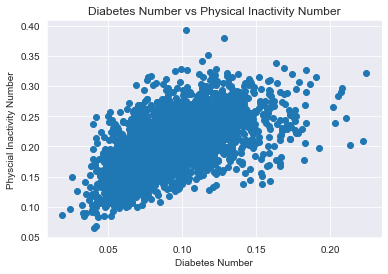

In [12]:
#EDA Graph 1
plt.scatter(diabetes['Diabetes_Number'], diabetes["Physical_Inactivity_Number"])
plt.title("Diabetes Number vs Physical Inactivity Number")
plt.xlabel("Diabetes Number")
plt.ylabel("Physcial Inactivity Number")
plt.show()


EDA Graph 1: Appears to be linear! Looks like there is a posiitve assocation between physcial activity and diabetes number. With less physical activity the diabetes number goes up. This makes logical sense since physical inactivity, possibly leading to obesity, has been linked to diabetes. There are a few outliers (those who have limited physical activity and a relatively low Diabetes number). 


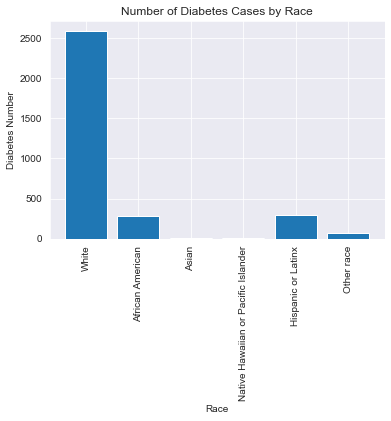

In [13]:
#EDA Graph 2
wr = sum(diabetes["race_total population_one race_white"])
br = sum(diabetes["race_total population_one race_black or african american"])
ar = sum(diabetes["race_total population_one race_asian_other asian"])
pir = sum(diabetes["race_total population_one race_native hawaiian and other pacific islander_native hawaiian"])
hr = sum(diabetes["hispanic or latino and race_total population_hispanic or latino (of any race)"])
other = sum(diabetes["race_total population_one race_some other race"])

races = pd.DataFrame({"Races": ["White", "African American", "Asian", "Native Hawaiian or Pacific Islander", 
                     "Hispanic or Latinx", "Other race"], 
                     'Count': [wr, br, ar, pir, hr, other]},)
x_axis = races["Races"]
y_axis = races["Count"]

plt.bar(x_axis,y_axis)             
plt.title("Number of Diabetes Cases by Race")
plt.xticks(x_axis, rotation = 90)
plt.xlabel("Race")
plt.ylabel("Diabetes Number")
plt.show()

#race white vs diabetes number (scatter) could do several graphs

In [ ]:
#EDA Graph 2
plt.scatter(diabetes['race_total population_one race_white'], diabetes["Diabetes_Number"])
plt.title("Total White Population Diabetes Number")
plt.xlabel("Race: White")
plt.ylabel("Diabetes Number")
plt.show()

plt.scatter(diabetes["race_total population_one race_black or african american"], diabetes["Diabetes_Number"])
plt.title("Total African American Population Diabetes Number")
plt.xlabel("Race: African American")
plt.ylabel("Diabetes Number")
plt.show()

plt.scatter(diabetes['race_total population_one race_native hawaiian and other pacific islander_native hawaiian'], 
            diabetes["Diabetes_Number"])
plt.title("Total Latinx Population Diabetes Number")
plt.xlabel("Race: Latinx")
plt.ylabel("Diabetes Number")
plt.show()

plt.scatter(diabetes["race_total population_one race_asian_other asian"], diabetes["Diabetes_Number"])
plt.title("Total Asain Population Diabetes Number")
plt.xlabel("Race: Asian")
plt.ylabel("Diabetes Number")
plt.show()

plt.scatter(diabetes["race_total population_one race_some other race"], diabetes["Diabetes_Number"])
plt.title("Total Other Race Population Diabetes Number")
plt.xlabel("Race: Other")
plt.ylabel("Diabetes Number")
plt.show()

EDA Graph 2: Looked at total diabetes cases by race (features with two or more races were not included in this analysis). It appears that Caucasian people have many more cases (over 2500) than any other race. It appears that for every one Hispanic or African American person with diabetes (next two closest groups) there are about five caucasian cases! Seems odd, but it could be that Caucasian people seek more medical treatment than the other groups--catching diabetes earlier or more often--or their could be other biological or environmental factors at play. 

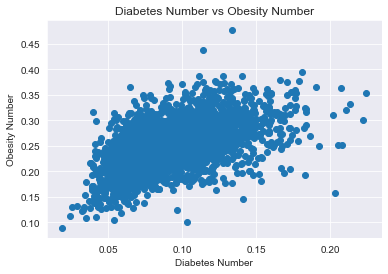

In [14]:
#EDA Graph 3
plt.scatter(diabetes['Diabetes_Number'], diabetes["Obesity_Number"])
plt.title("Diabetes Number vs Obesity Number")
plt.xlabel("Diabetes Number")
plt.ylabel("Obesity Number")
plt.show()


array([[<AxesSubplot:title={'center':'sex and age_total population_65 years and over_male'}>]],
      dtype=object)

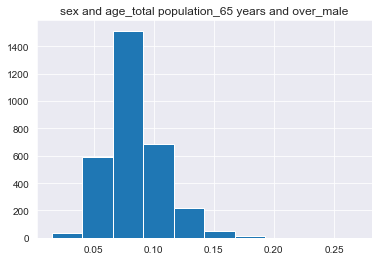

In [15]:
diabetes.hist('sex and age_total population_65 years and over_male')

EDA Graph 3: Much like scatter plot for the first exploratory data analysis, there appears to be a positive, linear association between obestiy number and diabetes number. As the obesity number increases so does the diabetes number. This makes logical sense since obesity has been linked to diabetes. 


## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'State' to be a categorical variable using `pd.get_dummies` and drop 'County' using `.drop()` because 'CountyFIPS' is already a unique identifier for the county. 

In [16]:
# create dummy features out of 'State' , which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ["State"],  
                               drop_first = True) # only create 49 dummies by dropping first in category

# drop 'County' variable
diabetes_clean = diabetes_clean.drop(labels = ['County'],
                               axis = 1) # which axis tells python we want to drop columns rather than index rows?

# look at first 10 rows of new data frame 
diabetes_clean.head(10) 

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

### 3.2/3.3 Partition Data and Feature Selection

Now, we will partition our data to prepare it for the training process. We will use 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

In [26]:
from sklearn.model_selection import train_test_split

# Set y 
y = diabetes_clean['Diabetes_Number']

# X (everything except diabetes, our target)
# create X by dropping our y variable from the df with the .drop() method.
X = diabetes_clean.drop(["Diabetes_Number"], axis = 1) # refers to columns
X = pd.get_dummies(X)
X.head()

,CountyFIPS,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race - and three or mo

We should also preprocess our data. Using the `preprocessing` module from sklearn, let's scale our features so that they are mean-centered.

In [27]:
from sklearn import preprocessing

X = preprocessing.scale(X)

We can also get rid of the 0 variance features using the `VarianceThreshold()` method from `feature_selection`. 

In [28]:
from sklearn import feature_selection

selector = feature_selection.VarianceThreshold(0)
X = selector.fit_transform(X)

And finally, let's split our data:

In [29]:
# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_validate is", X_validate.shape)
print("Shape of y_validate is", y_validate.shape)

Shape of X train is (2489, 135)
Shape of y_train is (2489,)
Shape of X_test is (623, 135)
Shape of y_test is (623,)
Shape of X train is (1866, 135)
Shape of y_train is (1866,)
Shape of X_validate is (623, 135)
Shape of y_validate is (623,)


## 4. Train Models

# OLS Regression

In [30]:
# create a model
lin_reg = LinearRegression(normalize=True)

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

In [31]:
print(lin_model.coef_)
print(lin_model.intercept_)

[ 2.19904364e-01  7.51026084e-03  6.66005202e-03  3.81976981e-04
  3.18572904e-04  3.55667919e+10  3.68176146e+10  1.08132840e+10
  9.31284256e+09  4.93988852e+09  6.39079145e-04 -1.27961692e-03
  5.63602301e-04  8.09191874e-04  2.35967270e+10 -5.82838726e+09
 -5.94645634e+09 -9.21394343e+09 -2.92376269e+09 -2.11618445e+09
 -2.49096962e+09 -4.70454432e+09 -7.20868515e+10  5.03366544e+10
  8.86873130e+09  1.27895227e+10  2.32631654e+10  2.51267978e+09
 -3.10801028e-03 -1.07765116e-02 -2.30362788e-03  6.24921815e-04
 -1.25609485e-03 -1.29407841e-01 -5.79531978e-02 -4.48170456e-02
 -4.37773998e-03 -3.24439728e-02  7.25763859e+09  4.61529523e+09
  5.09545626e+08  2.99397558e+08  1.38365143e+09  4.53894822e+09
  1.14767640e+10  8.18799950e+09  4.27171398e+09  1.56843117e+09
  2.19825319e+08  1.31032621e+08  2.48953326e+10 -1.24376691e+09
 -2.38028262e+10 -6.01278289e-04 -9.37705573e+09  6.38705826e+09
  5.72134145e+09  2.85842789e+10  2.85842789e+10 -1.65079909e-02
  1.83933520e+09  1.83994

     Coefficient                                            Feature
0       0.219904                                         CountyFIPS
1       0.007510                                     Obesity_Number
2       0.006660                         Physical_Inactivity_Number
3       0.000382  sex and age_total population_65 years and over...
4       0.000319                              race_total population
..           ...                                                ...
131    -0.085765                                     State_Virginia
132    -0.099944                                   State_Washington
133    -0.121251                                State_West Virginia
134    -0.067353                                    State_Wisconsin
135     0.000000                                      State_Wyoming

[136 rows x 2 columns]


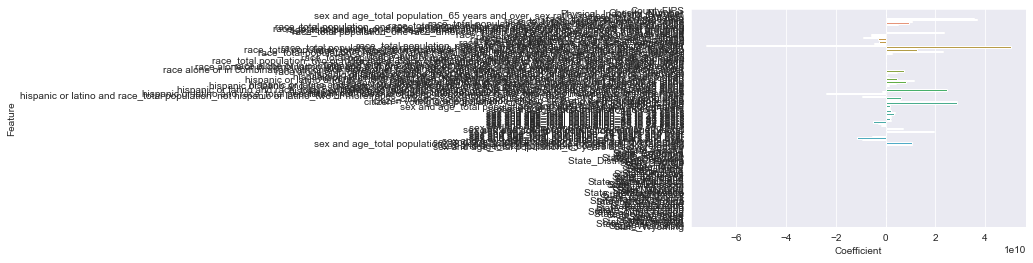

In [33]:
# Create a dataframe with the coefficient and feature names
lin_reg_data = pd.DataFrame([lin_model.coef_,
                               diabetes_clean.drop(columns = ['Diabetes_Number']).columns]).T
lin_reg_data.columns = ["Coefficient", 'Feature']

# Plot
lin_reg_data.replace(to_replace=[None], value= 0, inplace=True)
lin_reg_data['Coefficient'] = lin_reg_data['Coefficient'].astype(float)
print(lin_reg_data)
ax = sns.barplot(x="Coefficient", y="Feature", data=lin_reg_data)
plt.show()


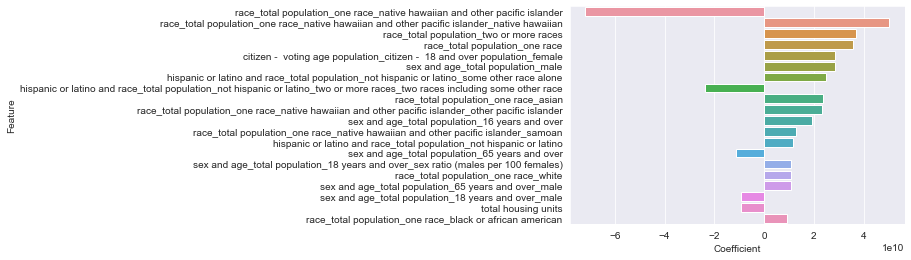

In [39]:
# Create a dataframe with the coefficient and feature names
lin_reg_data = pd.DataFrame([lin_model.coef_,
                               diabetes_clean.drop(columns = ['Diabetes_Number']).columns]).T
lin_reg_data.columns = ["Coefficient", 'Feature']

# Plot
lin_reg_data.replace(to_replace=[None], value= 0, inplace=True)
lin_reg_data['Coefficient'] = lin_reg_data['Coefficient'].astype(float)
lin_reg_data['Coefficient_Abs'] = abs(lin_reg_data['Coefficient'])
ax = sns.barplot(x="Coefficient", y="Feature", data=lin_reg_data.nlargest(20, "Coefficient_Abs"))
plt.show()

Let's try this again

## 5. Validate and Refine Models

In [25]:
# use X_validation and y_validation data sets to evaluate and refine your models

## 6. Discussion Questions

6.1    What is bias-variance tradeoff ?  Why is it relevant to machine learning problems like this one?
According to textbook
Answer: According to James et al. (2013), the bias-variance trade-off is the balance of two types of error: bias and variance. Bias is the differences between a model's prediction and the actual values of an observation. Variance refers to the complexiety of the model and the amount by which the predicted "f" would  change if estimated with a different set of observations. Since we want to minimize the mean square error, we want a model that acheives both low bias and low variance; however, this is rarely possible in real life leading to the trade-off. When fiting models, one must determine if they want to decrease bias but increase variance or vice versa. There are impications to both low bias/high variance and high bias/lower variance leading to under and overfitting, respectively. 
The bias-variance trade-off is particulary important to machine learning, such as the one posed to us in this project, as it allows us to select the model that works best given how it performs on the training and validation sets. By splitting the observations from the data into a training set (~80% of the data), validation set (~20%), and test set (~20%), we can train our various models to see how it is picking up on the nuances and patterns on a particular training set, validate the model to understand its variance and tweak the model(s) or select a new model alltogher before using it on the test set and future data to make predictions.    

6.2    Define  overfitting,  and  why  it  matters  for  machinelearning.  How can we address it?

6.3    Discuss your Analysis in 2-3 Paragraphs